## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


** Question 1 **
Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


![image.png](attachment:image.png)

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#/media/File:Monty_open_door.svg )

[Monty hall problem ]

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [44]:
#Import libraries required for the simulation
import random as rd
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#Case 1 - The contestant keeps his/her original door

#Set player 1 win count to zero
p1_wins=0

#Build the simulation with 1000 runs and the player keeping their intial choice
for i in range(1000):
    car_door=rd.randint(1, 3) #Randomly choose which door has the car
    p1_choice=rd.randint(1, 3) #Player selects one of the three doors
    host_doors=[1, 2, 3] #Create the door list from which the host will remove a door
    host_doors.remove(car_door) #The host cannot open the car door, so it must be removed
    if p1_choice!=car_door:
        host_doors.remove(p1_choice) #This ensures that the host cannot open the door P1 chose when it's not the winning door
    opened_door=random.choice(host_doors) #The host randomly opens one of the possible remaining doors
    if p1_choice==car_door: 
        p1_wins+=1 #Counter assigns player 1 a win each time his/her choice is the car door

print(p1_wins)

331


In [47]:
#Case 2 - The contestant SWITCHES to the other door

#Set player 2 win count to zero
p2_wins=0

#Build the simulation with 1000 runs and the player SWITCHING doors
for i in range(1000):
    car_door=rd.randint(1, 3) #Randomly choose which door has the car
    p2_choice=rd.randint(1, 3) #Player selects one of the three doors
    host_doors=[1, 2, 3] #Create the door list from which the host will remove a door
    host_doors.remove(car_door) #The host cannot open the car door, so it must be removed
    if p2_choice!=car_door:
        host_doors.remove(p2_choice) #This ensures that the host cannot open the door P2 chose when it's not the winning door
    opened_door=random.choice(host_doors) #The host randomly opens one of the possible remaining doors
    
    #In case 2, we must account for P2 switching his/her choice
    player_doors=[1, 2, 3]
    player_doors.remove(opened_door) #The player cannot choose the door opened by the host
    player_doors.remove(p2_choice) #The player will always switch from his/her intial choice
    p2_new_choice=rd.choice(player_doors) #There will never be more than one option at this point
    if p2_new_choice==car_door:
        p2_wins+=1

print(p2_wins)

659


In [48]:
#Compare the two strategies' effectiveness

#Total Number of Wins
#Player 1
print(p1_wins)

#Player 2
print(p2_wins)

#Winning Percentage
#Player 1
print(p1_wins/1000)
print(p2_wins/1000)

#Of course, as the number of simulations increases, we would expect these "winning percentage" values to approach their
#theoretial values of 1/3 (Player 1) and 2/3 (Player 2)

331
659
0.331
0.659


In [49]:
#For clarity's sake, we can create place these values in an easy-to-read dataframe
results = {"Total Number of Wins": [p1_wins, p2_wins], "Winning Percentage": [p1_wins/1000, p2_wins/1000]}
results_df = pd.DataFrame(data=results, index=["Player 1", "Player 2"])
results_df

,Total Number of Wins,Winning Percentage
Player 1,331,0.331
Player 2,659,0.659


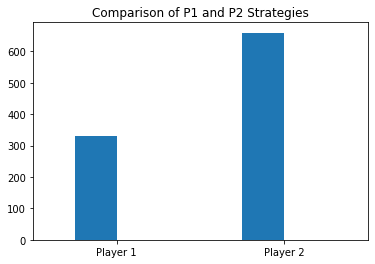

In [50]:
#We can also examine the difference between strategies visually, using pd.plot
results_df.plot.bar(title="Comparison of P1 and P2 Strategies", legend=False, rot=0)

In [ ]:
#Based on the above crosstab and plot, it is evident that switching is a better strategy than holding, as the win probability
#is essentially doubled by switching